In [1]:
!pip install simfin

In [33]:
import simfin as sf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

from simfin.names import *

In [3]:
def getData():
    sf.set_api_key('free')

    # Set the local directory where data-files are stored.
    # The dir will be created if it does not already exist.
    sf.set_data_dir('~/simfin_data/')

    # Load daily share-prices for all companies in USA.
    # The data is automatically downloaded if you don't have it already.
    return sf.load_shareprices(market='us', variant='daily')

In [4]:
def getStocks(df_prices, list_of_stocks, numberOfDays):
    # Plot the closing share-prices for ticker MSFT.
    #msft_close_values_TEMP = df_prices.loc['MSFT']
    #print(msft_close_values_TEMP.columns)

    big_df = pd.DataFrame()
    df_list = []
    for stock in list_of_stocks:
        temp_df = df_prices.loc[stock].tail(numberOfDays)
        temp_df = temp_df[["SimFinId", "Close", "Open", "High", "Low"]]
        big_df = pd.concat([big_df, temp_df])
        df_list.append(temp_df)

    ultimate_df = big_df

    return ultimate_df, df_list

In [5]:
# Load in entire data frame
data = getData()

Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!


In [22]:
# Picking out individual data for stocks and days
stock_name = ['AAPL']
num_days = 410

In [23]:
# Current stock as a data frame
cur_stock, _ = getStocks(data, stock_name, num_days)
cur_stock.head()

,SimFinId,Close,Open,High,Low
Date,,,,,
2018-03-21,111052,42.82,43.76,43.77,42.81
2018-03-22,111052,42.21,42.50,43.17,42.15
2018-03-23,111052,41.23,42.10,42.48,41.23
2018-03-26,111052,43.19,42.02,43.27,41.61
2018-03-27,111052,42.09,43.42,43.79,41.73


In [75]:
# Setting up new column for closing values and shifting data accordingly
future_price = cur_stock["Close"]
future_price = future_price.tail(len(future_price)-10)
cur_stock = cur_stock.head(len(future_price))

In [76]:
# Splitting into testing and training sets
x = cur_stock
y = future_price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [77]:
# Training values
model = SVR(C=1.0, kernel='rbf',gamma='auto')
model.fit(x_train, y_train)
train_predict = model.predict(x_train)
model.score(x_train, y_train)

0.7466699233249088

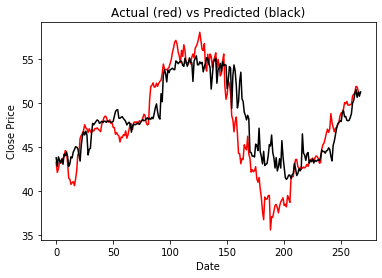

In [78]:
# Plotting training results
plt.figure()
plt.title("Actual (red) vs Predicted (black)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(range(0,len(x_train)), y_train, c='r')
plt.plot(range(0,len(x_train)), train_predict, c='k')

In [79]:
# Testing values
test_predict = model.predict(x_test)
model.score(x_test, y_test)

-0.25431126700362205

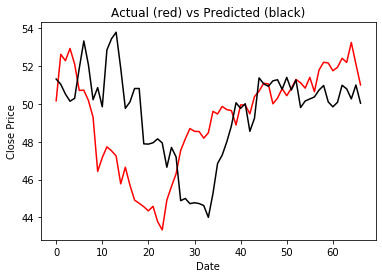

In [80]:
# Plotting testing results
plt.figure()
plt.title("Actual (red) vs Predicted (black)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(range(0,len(x_test)), y_test, c='r')
plt.plot(range(0,len(x_test)), test_predict, c='k')